## Lead Scoring Case Study Analysis
With 37 predictor variables we need to predict whether a particular customer will convert or not; to a payable customer.

### Step 1: Importing Data

In [379]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [380]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [381]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2. Inspecting the Dataframe

In [382]:
lead_data.shape

(9240, 37)

In [383]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [384]:
# Lets see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [385]:
## Checking for null values in dataset. Check for  % of values
missing_data = (100* lead_data.isnull().sum()/lead_data.shape[0]).reset_index()
missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

In [386]:
missing_data

,column_name,% missing
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Do Not Call,0.000000
6,Converted,0.000000
7,TotalVisits,1.482684
8,Total Time Spent on Website,0.000000
9,Page Views Per Visit,1.482684


In [387]:
## Prospect ID and Lead Number are unique for each customer. WE can drop the prospect ID.
lead_data['Lead Number'].value_counts().sum()
lead_data['Prospect ID'].value_counts().sum()

9240

In [388]:
## Drop the Prospect ID - as it is too complicated to explain to other stakeholders
lead_data.drop(['Prospect ID'],axis=1,inplace=True)

### Step 3: Data Preparation

#### Converting the binary variables to 0/1

In [389]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper', 
           'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [390]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### Converting columns with select to null values. (as the user didnt select anything)

In [391]:
lead_data = lead_data.replace('Select',np.nan)

In [392]:
## Checking for null values in dataset. Check for  % of values
missing_data = (100* lead_data.isnull().sum()/lead_data.shape[0]).reset_index()
missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

In [393]:
missing_data.sort_values(by ='% missing',ascending = False)

,column_name,% missing
12,How did you hear about X Education,78.463203
27,Lead Profile,74.188312
24,Lead Quality,51.590909
29,Asymmetrique Activity Index,45.649351
32,Asymmetrique Profile Score,45.649351
30,Asymmetrique Profile Index,45.649351
31,Asymmetrique Activity Score,45.649351
28,City,39.707792
11,Specialization,36.580087
23,Tags,36.287879


#### How did you hear about X Education has 78% Missing values. Dropping it.

In [394]:
lead_data.drop('How did you hear about X Education',axis = 1, inplace=True)

#### Lead Profile also has 74% missing values. better to drop it. (Though it might give us some insights)

In [395]:
lead_data.drop('Lead Profile',axis = 1, inplace=True)

In [396]:
lead_data.shape

(9240, 34)

#### City also can be dropped as there are close to 40% missing values. Doesnt have much information

In [397]:
lead_data.drop('City',axis = 1, inplace=True)

In [398]:
lead_data.shape

(9240, 33)

#### Asymmetric activity seems to be an interesting variable; as it tracks the customer activity on the website. 
#### It has more than 40% missing values. Lets drop them. 

In [399]:
lead_data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score'],axis = 1, inplace=True)

In [400]:
lead_data.shape

(9240, 29)

In [401]:
## Checking for null values in dataset. Check for  % of values
missing_data = (100* lead_data.isnull().sum()/lead_data.shape[0]).reset_index()
missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

missing_data.sort_values(by ='% missing',ascending = False)

,column_name,% missing
23,Lead Quality,51.590909
11,Specialization,36.580087
22,Tags,36.287879
13,What matters most to you in choosing a course,29.318182
12,What is your current occupation,29.112554
10,Country,26.634199
6,TotalVisits,1.482684
8,Page Views Per Visit,1.482684
9,Last Activity,1.114719
2,Lead Source,0.389610


#### Lead Quality seems to be a good variable. But dropping it as we have more than 50% missing values.

In [402]:
lead_data.drop(['Lead Quality'],axis = 1, inplace=True)

In [403]:
## Checking for null values in dataset. Check for  % of values
missing_data = (100* lead_data.isnull().sum()/lead_data.shape[0]).reset_index()
missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

missing_data.sort_values(by ='% missing',ascending = False)

,column_name,% missing
11,Specialization,36.580087
22,Tags,36.287879
13,What matters most to you in choosing a course,29.318182
12,What is your current occupation,29.112554
10,Country,26.634199
6,TotalVisits,1.482684
8,Page Views Per Visit,1.482684
9,Last Activity,1.114719
2,Lead Source,0.389610
20,Through Recommendations,0.000000


#### Checking specialization value counts

In [404]:
lead_data.Specialization.value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

#### Specialization is evenly distributed. Better to fill the na with 'Others'

In [405]:
lead_data.Specialization.fillna('Others',inplace = True)

#### Checking tags value counts

In [406]:
lead_data.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

#### Tags has too many levels. Also, it just indicates the current status. We can drop it; as it may not be useful for prediction purpose

In [407]:
lead_data.drop(['Tags'],axis = 1, inplace=True)

#### Checking the next column with highest missing values

In [408]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

#### 99.95% of leads have mentioned "Better Career Prospects". This may not be useful for modeling

In [409]:
lead_data.drop(['What matters most to you in choosing a course'],axis = 1, inplace=True)

#### Checking the next column. Occupation

In [410]:
lead_data['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [411]:
### WE can impute the missing values with Unemployed

In [412]:
lead_data['What is your current occupation'].fillna('Unemployed',inplace = True)

In [413]:
## Checking for null values in dataset. Check for  % of values
missing_data = (100* lead_data.isnull().sum()/lead_data.shape[0]).reset_index()
missing_data.rename(columns = {"index":"column_name",0:"% missing"},inplace = True)

missing_data.sort_values(by ='% missing',ascending = False)

,column_name,% missing
10,Country,26.634199
6,TotalVisits,1.482684
8,Page Views Per Visit,1.482684
9,Last Activity,1.114719
2,Lead Source,0.389610
0,Lead Number,0.000000
16,X Education Forums,0.000000
24,A free copy of Mastering The Interview,0.000000
23,I agree to pay the amount through cheque,0.000000
22,Get updates on DM Content,0.000000


#### Checking for country

In [414]:
lead_data['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
Canada                   0.059006
Nigeria                  0.059006
Kuwait                   0.059006
South Africa             0.059006
Sweden                   0.044254
Netherlands              0.029503
Uganda                   0.029503
Belgium                  0.029503
Italy                    0.029503
Ghana                    0.029503
Philippines              0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
China                    0.029503
Kenya                    0.014751
Sri Lanka     

##### Since most of the records are from India, we can drop the column

In [415]:
lead_data.drop(['Country'],axis = 1, inplace=True)

#### Rest of the missing values are under 2%. We can drop those records

In [416]:
lead_data.dropna(inplace =True)

In [417]:
lead_data.shape

(9074, 25)

#### Checking for duplicate records. There are no duplicate records

In [418]:
lead_data[lead_data.duplicated()]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [419]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9074 non-null   int64  
 1   Lead Origin                               9074 non-null   object 
 2   Lead Source                               9074 non-null   object 
 3   Do Not Email                              9074 non-null   int64  
 4   Do Not Call                               9074 non-null   int64  
 5   Converted                                 9074 non-null   int64  
 6   TotalVisits                               9074 non-null   float64
 7   Total Time Spent on Website               9074 non-null   int64  
 8   Page Views Per Visit                      9074 non-null   float64
 9   Last Activity                             9074 non-null   object 
 10  Specialization                      

#### Creating Dummy Records

In [420]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [421]:
lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity'],axis=1,inplace=True)

In [422]:
lead_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [423]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Search                                                9074 non-null   int64  
 8   Magazine                                              9074

### Checking for outliers in the continuous variables

In [424]:
# Checking for outliers in the continuous variables
num_lead_data = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [425]:
## For Total Visits and Page Views per Visit; there seem to be outliers. Lets only select upto 99% ile

In [426]:
lead_data=lead_data[num_lead_data.TotalVisits<=num_lead_data.TotalVisits.quantile(.99)]

In [427]:
lead_data=lead_data[num_lead_data['Page Views Per Visit']<=num_lead_data['Page Views Per Visit'].quantile(.99)]

In [428]:
lead_data.shape

(8924, 96)

### Step 4: Test Train Split

In [429]:
from sklearn.model_selection import train_test_split

In [430]:
# Putting feature variable to X
X = lead_data.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [431]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [432]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [433]:
from sklearn.preprocessing import MinMaxScaler

In [434]:
## Used a min max scaler as the 3 continuous variables are generally positive. Can be useful to compare with other variables which also vary between 0 and 1
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6676,0,0,0.176471,0.548856,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6138,0,0,0.235294,0.359155,0.444444,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8650,0,0,0.176471,0.496479,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3423,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6552,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking the Conversion Rate. We have almost 37% Conversion Rate


In [435]:
conversion = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
conversion

37.75212909009413

### Step 6: Understanding the correlations

In [436]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

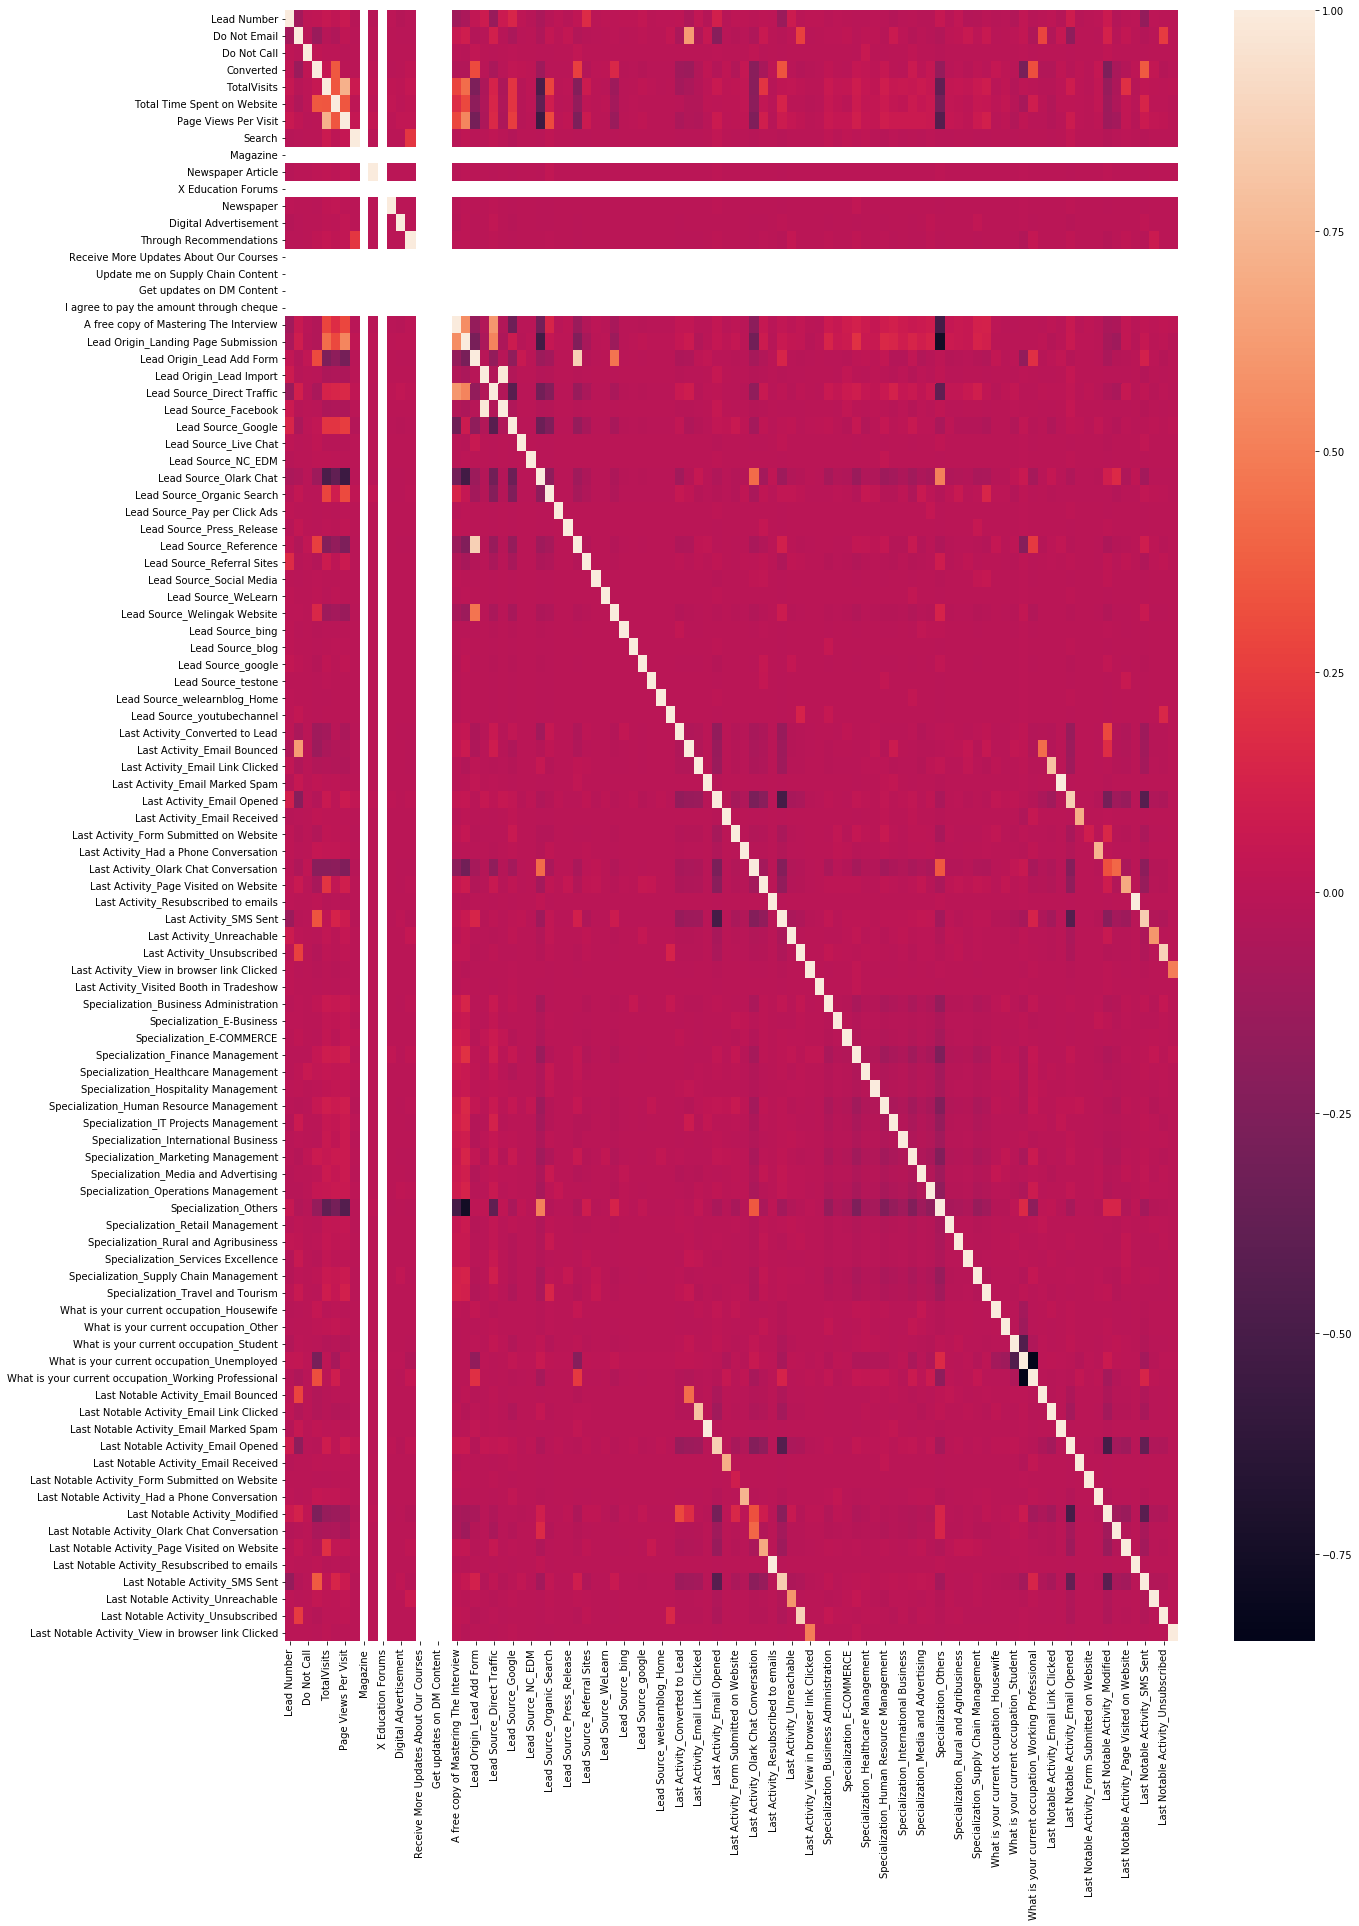

In [437]:
# Let's see the correlation matrix. Seems to be quite large to make any conclusions. Lets use the RFE to select the features 
plt.figure(figsize = (20,30))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = False)
plt.show()


### Step 7: Feature selection using RFE

In [438]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [439]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [440]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [441]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 21),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 55),
 ('Magazine', False, 69),
 ('Newspaper Article', False, 3),
 ('X Education Forums', False, 68),
 ('Newspaper', False, 5),
 ('Digital Advertisement', False, 61),
 ('Through Recommendations', False, 14),
 ('Receive More Updates About Our Courses', False, 67),
 ('Update me on Supply Chain Content', False, 74),
 ('Get updates on DM Content', False, 73),
 ('I agree to pay the amount through cheque', False, 66),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 72),
 ('Lead Source_Olark 

In [442]:
col = X_train.columns[rfe.support_]

In [443]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Mark

#### Assessing the model using statsmodels

In [444]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.1
Date:                Thu, 13 Jul 2023   Deviance:                       5052.2
Time:                        16:09:04   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3324      0.169      1.972      0.049       0.002       0.663
Do Not Email                                            -1.5370      0.209     -7.364      0.000      -1.946      -1.128
TotalVisits                                              1.6899      0.304      5.560      0.000       1.094       2.286
Total Time Spent on Website                              4.4864      0.170     26.404      0.000       4.153       4.819
Page Views Per Visit                                    -1.3813      0.271     -5.104      0.000      -1.912      -0.851
Lead Origin_Landing Page Submission                     -0.9918      0.129     -7.661      0.000      -1.246      -0.738
Lead Origin_Lead Add Form                                3.2789      0.252     13.033      0.000       2.786       3.772
Lead Source_Olark Chat                                   0.9848      0.140      7.041      0.000       0.711       1.259
Lead Source_Welingak Website                             2.4586      0.763      3.224      0.001       0.964       3.953
Last Activity_Converted to Lead                         -1.0440      0.231     -4.510      0.000      -1.498      -0.590
Last Activity_Email Bounced                             -1.2803      0.429     -2.982      0.003      -2.122      -0.439
Last Activity_Had a Phone Conversation                   2.6108      0.936      2.789      0.005       0.776       4.446
Last Activity_Olark Chat Conversation                   -1.4444      0.204     -7.087      0.000      -1.844      -1.045
Specialization_Others                                   -1.0170      0.126     -8.043      0.000      -1.265      -0.769
What is your current occupation_Housewife               23.0874   1.66e+04      0.001      0.999   -3.25e+04    3.26e+04
What is your current occupation_Working Professional     2.5808      0.192     13.429      0.000       2.204       2.957
Last Notable Activity_Email Link Clicked                -2.0199      0.260     -7.760      0.000      -2.530      -1.510
Last Notable Activity_Email Opened                      -1.5553      0.090    -17.335      0.000      -1.731      -1.379
Last Notable Activity_Modified                          -1.7891      0.103    -17.305      0.000      -1.992      -1.586
Last Notable Activity_Olark Chat Conversation           -1.6257      0.382     -4.251      0.000      -2.375      -0.876
Last Notable Activity_Page Visited on Website           -2.1883      0.216    -10.116      0.000      -2.612      -1.764
========================================================================================================================
"""

In [445]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

6676    0.521342
6138    0.676032
8650    0.919178
3423    0.050531
6552    0.221811
1696    0.057706
2110    0.931269
6830    0.009817
2581    0.297652
5927    0.146026
4332    0.127465
8244    0.107141
1820    0.839291
3814    0.864134
7047    0.718255
619     0.870335
1512    0.479596
3399    0.901674
1226    0.050531
6081    0.077275
dtype: float64

In [446]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([0.52134223, 0.67603157, 0.91917767, 0.05053069, 0.22181135,
       0.05770589, 0.93126937, 0.00981678, 0.29765178, 0.14602641,
       0.12746529, 0.10714135, 0.83929084, 0.86413416, 0.71825474,
       0.87033528, 0.47959622, 0.90167368, 0.05053069, 0.07727502])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities


In [447]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.521342,6676
1,1,0.676032,6138
2,1,0.919178,8650
3,0,0.050531,3423
4,0,0.221811,6552


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0


In [448]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.521342,6676,1
1,1,0.676032,6138,1
2,1,0.919178,8650,1
3,0,0.050531,3423,0
4,0,0.221811,6552,0


In [449]:
### Lets track the various model metrics and accuracy - to evaluate the model
from sklearn import metrics

In [450]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3432  439]
 [ 682 1693]]


In [451]:
# Predicted     Not_Converted    Converted
# Actual
# Not_Converted        3432      439
# Converted            796     1650  

In [452]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8205251360870958


#### Checking VIFs

In [453]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [454]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.17
1,TotalVisits,5.07
4,Lead Origin_Landing Page Submission,4.18
12,Specialization_Others,2.94
17,Last Notable Activity_Modified,2.86
6,Lead Source_Olark Chat,2.24
2,Total Time Spent on Website,2.10
11,Last Activity_Olark Chat Conversation,2.10
16,Last Notable Activity_Email Opened,2.05
0,Do Not Email,1.88


In [455]:
### The VIFs seem to be fine. But the p-values seem to be high for certain features.
### Lets drop What is your current occupation_housewife

In [456]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [457]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.5
Date:                Thu, 13 Jul 2023   Deviance:                       5063.0
Time:                        16:09:46   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3384      0.168      2.009      0.045       0.008       0.668
Do Not Email                                            -1.5385      0.209     -7.374      0.000      -1.947      -1.130
TotalVisits                                              1.6777      0.304      5.524      0.000       1.082       2.273
Total Time Spent on Website                              4.4842      0.170     26.423      0.000       4.152       4.817
Page Views Per Visit                                    -1.3907      0.270     -5.142      0.000      -1.921      -0.861
Lead Origin_Landing Page Submission                     -0.9881      0.129     -7.641      0.000      -1.241      -0.735
Lead Origin_Lead Add Form                                3.2766      0.251     13.035      0.000       2.784       3.769
Lead Source_Olark Chat                                   0.9785      0.140      7.003      0.000       0.705       1.252
Lead Source_Welingak Website                             2.4545      0.762      3.219      0.001       0.960       3.949
Last Activity_Converted to Lead                         -1.0517      0.231     -4.546      0.000      -1.505      -0.598
Last Activity_Email Bounced                             -1.2823      0.429     -2.989      0.003      -2.123      -0.441
Last Activity_Had a Phone Conversation                   2.6061      0.936      2.786      0.005       0.773       4.440
Last Activity_Olark Chat Conversation                   -1.4466      0.204     -7.099      0.000      -1.846      -1.047
Specialization_Others                                   -1.0207      0.126     -8.079      0.000      -1.268      -0.773
What is your current occupation_Working Professional     2.5750      0.192     13.402      0.000       2.198       2.952
Last Notable Activity_Email Link Clicked                -2.0192      0.260     -7.757      0.000      -2.529      -1.509
Last Notable Activity_Email Opened                      -1.5484      0.090    -17.276      0.000      -1.724      -1.373
Last Notable Activity_Modified                          -1.7838      0.103    -17.273      0.000      -1.986      -1.581
Last Notable Activity_Olark Chat Conversation           -1.6198      0.382     -4.236      0.000      -2.369      -0.870
Last Notable Activity_Page Visited on Website           -2.1864      0.216    -10.110      0.000      -2.610      -1.763
========================================================================================================================
"""

In [458]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [459]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [460]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.523884,6676,1
1,1,0.676453,6138,1
2,1,0.919514,8650,1
3,0,0.050492,3423,0
4,0,0.222323,6552,0


In [461]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8203650336215178


### The accuracy is still 80%. Lets check the VIFs again

In [462]:
vif1 = pd.DataFrame()
vif1['Features'] = X_train[col].columns
vif1['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
3,Page Views Per Visit,6.17
1,TotalVisits,5.07
4,Lead Origin_Landing Page Submission,4.18
12,Specialization_Others,2.94
16,Last Notable Activity_Modified,2.86
6,Lead Source_Olark Chat,2.24
11,Last Activity_Olark Chat Conversation,2.10
2,Total Time Spent on Website,2.10
15,Last Notable Activity_Email Opened,2.05
0,Do Not Email,1.88


In [463]:
col = col.drop('Page Views Per Visit', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [464]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.0
Date:                Thu, 13 Jul 2023   Deviance:                       5090.0
Time:                        16:12:55   Pearson chi2:                 6.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0737      0.160      0.461      0.645      -0.240       0.387
Do Not Email                                            -1.5588      0.208     -7.487      0.000      -1.967      -1.151
TotalVisits                                              0.9137      0.264      3.455      0.001       0.395       1.432
Total Time Spent on Website                              4.4730      0.169     26.421      0.000       4.141       4.805
Lead Origin_Landing Page Submission                     -1.0487      0.128     -8.177      0.000      -1.300      -0.797
Lead Origin_Lead Add Form                                3.5057      0.248     14.153      0.000       3.020       3.991
Lead Source_Olark Chat                                   1.1867      0.134      8.841      0.000       0.924       1.450
Lead Source_Welingak Website                             2.4402      0.762      3.201      0.001       0.946       3.935
Last Activity_Converted to Lead                         -0.9720      0.231     -4.205      0.000      -1.425      -0.519
Last Activity_Email Bounced                             -1.1819      0.428     -2.760      0.006      -2.021      -0.343
Last Activity_Had a Phone Conversation                   2.5775      0.956      2.696      0.007       0.703       4.452
Last Activity_Olark Chat Conversation                   -1.4250      0.203     -7.010      0.000      -1.823      -1.027
Specialization_Others                                   -0.9964      0.126     -7.925      0.000      -1.243      -0.750
What is your current occupation_Working Professional     2.5743      0.192     13.418      0.000       2.198       2.950
Last Notable Activity_Email Link Clicked                -1.9675      0.259     -7.602      0.000      -2.475      -1.460
Last Notable Activity_Email Opened                      -1.5231      0.089    -17.084      0.000      -1.698      -1.348
Last Notable Activity_Modified                          -1.7636      0.103    -17.148      0.000      -1.965      -1.562
Last Notable Activity_Olark Chat Conversation           -1.5517      0.379     -4.097      0.000      -2.294      -0.809
Last Notable Activity_Page Visited on Website           -2.0044      0.212     -9.475      0.000      -2.419      -1.590
========================================================================================================================
"""

In [465]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [466]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [467]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.529512,6676,1
1,1,0.699830,6138,1
2,1,0.921161,8650,1
3,0,0.050952,3423,0
4,0,0.221136,6552,0


In [468]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8170028818443804


In [469]:
### Now, lets check the VIFs
vif2 = pd.DataFrame()
vif2['Features'] = X_train[col].columns
vif2['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
3,Lead Origin_Landing Page Submission,3.53
1,TotalVisits,3.21
15,Last Notable Activity_Modified,2.84
11,Specialization_Others,2.81
5,Lead Source_Olark Chat,2.17
10,Last Activity_Olark Chat Conversation,2.10
2,Total Time Spent on Website,2.09
14,Last Notable Activity_Email Opened,2.04
0,Do Not Email,1.88
8,Last Activity_Email Bounced,1.83


#### VIFs seem to be ok. Now, Lets go for prediction

In [470]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3420,  451],
       [ 692, 1683]], dtype=int64)

### Metrics beyond accuracy

In [471]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [472]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7086315789473684

In [473]:
# Let us calculate specificity
TN / float(TN+FP)

0.8834926375613537

In [474]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11650736243864634


In [475]:
# positive predictive value 
print (TP / float(TP+FP))

0.788659793814433


In [476]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8317120622568094


### Step 9: Plotting the ROC Curve

In [477]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [478]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

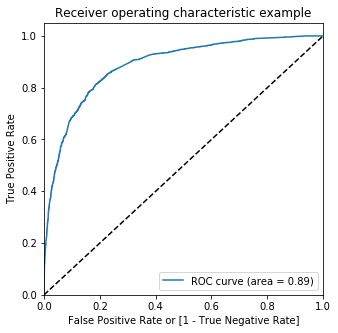

In [479]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [480]:
###Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [481]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.529512,6676,1,1,1,1,1,1,1,0,0,0,0
1,1,0.699830,6138,1,1,1,1,1,1,1,1,0,0,0
2,1,0.921161,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.050952,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.221136,6552,0,1,1,1,0,0,0,0,0,0,0


In [482]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.597342  0.971789  0.367605
0.2   0.2  0.759206  0.908632  0.667528
0.3   0.3  0.803714  0.848421  0.776285
0.4   0.4  0.816042  0.788211  0.833118
0.5   0.5  0.817003  0.708632  0.883493
0.6   0.6  0.805155  0.600000  0.931026
0.7   0.7  0.785303  0.516632  0.950142
0.8   0.8  0.762248  0.423158  0.970292
0.9   0.9  0.716779  0.274947  0.987858


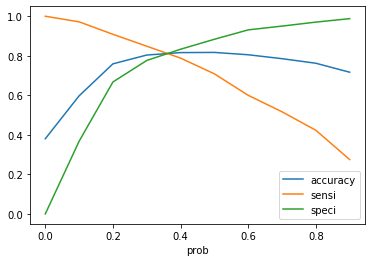

In [483]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the above curve, 0.4 seems to be optimal cutoff point

In [484]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.529512,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.699830,6138,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.921161,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.050952,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.221136,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [485]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8160422670509125

In [486]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3225,  646],
       [ 503, 1872]], dtype=int64)

In [487]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [488]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7882105263157895

In [489]:
# Let us calculate specificity
TN / float(TN+FP)

0.833118057349522

In [490]:
# Calculate false postive rate - predicting Conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1668819426504779


In [491]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7434471803018269


In [492]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8650751072961373


### Looking at Precision and Recall

##### Precision
TP / TP + FP

In [493]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7434471803018269

##### Recall
TP / TP + FN

In [494]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7882105263157895

In [495]:
from sklearn.metrics import precision_score, recall_score

In [496]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.788659793814433

In [497]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7086315789473684

### Precision Recall Tradeoff

In [498]:
from sklearn.metrics import precision_recall_curve

In [499]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    0
 6243    0
 6244    1
 6245    0
 Name: predicted, Length: 6246, dtype: int64)

In [500]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

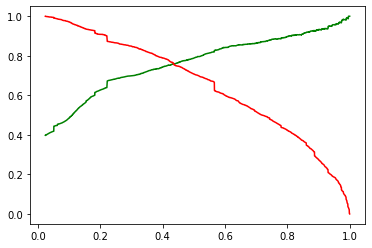

In [501]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [502]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [503]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7625,0,0.117647,0.713468,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5207,0,0.235294,0.390405,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2390,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4362,0,0.117647,0.102113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1023,0,0.882353,0.139525,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [504]:
X_test_sm = sm.add_constant(X_test)

In [505]:
y_test_pred = res.predict(X_test_sm)

In [506]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [507]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [508]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [509]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [510]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [511]:
y_pred_final.head()

,Converted,LeadID,0
0,0,7625,0.690134
1,1,5207,0.368929
2,1,2390,0.929765
3,0,4362,0.398731
4,0,1023,0.255829


In [512]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [513]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [514]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,7625,0,0.690134
1,5207,1,0.368929
2,2390,1,0.929765
3,4362,0,0.398731
4,1023,0,0.255829


In [515]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [516]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,7625,0,0.690134,1
1,5207,1,0.368929,0
2,2390,1,0.929765,1
3,4362,0,0.398731,0
4,1023,0,0.255829,0


In [517]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8028379387602689

In [518]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1393,  291],
       [ 237,  757]], dtype=int64)

In [519]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [520]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.761569416498994

In [521]:
# Let us calculate specificity
TN / float(TN+FP)

0.8271971496437055

In [522]:
# Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.7223282442748091

In [523]:
# Recall
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.761569416498994

### Summary

In [524]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.0
Date:                Thu, 13 Jul 2023   Deviance:                       5090.0
Time:                        16:18:24   Pearson chi2:                 6.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0737      0.160      0.461      0.645      -0.240       0.387
Do Not Email                                            -1.5588      0.208     -7.487      0.000      -1.967      -1.151
TotalVisits                                              0.9137      0.264      3.455      0.001       0.395       1.432
Total Time Spent on Website                              4.4730      0.169     26.421      0.000       4.141       4.805
Lead Origin_Landing Page Submission                     -1.0487      0.128     -8.177      0.000      -1.300      -0.797
Lead Origin_Lead Add Form                                3.5057      0.248     14.153      0.000       3.020       3.991
Lead Source_Olark Chat                                   1.1867      0.134      8.841      0.000       0.924       1.450
Lead Source_Welingak Website                             2.4402      0.762      3.201      0.001       0.946       3.935
Last Activity_Converted to Lead                         -0.9720      0.231     -4.205      0.000      -1.425      -0.519
Last Activity_Email Bounced                             -1.1819      0.428     -2.760      0.006      -2.021      -0.343
Last Activity_Had a Phone Conversation                   2.5775      0.956      2.696      0.007       0.703       4.452
Last Activity_Olark Chat Conversation                   -1.4250      0.203     -7.010      0.000      -1.823      -1.027
Specialization_Others                                   -0.9964      0.126     -7.925      0.000      -1.243      -0.750
What is your current occupation_Working Professional     2.5743      0.192     13.418      0.000       2.198       2.950
Last Notable Activity_Email Link Clicked                -1.9675      0.259     -7.602      0.000      -2.475      -1.460
Last Notable Activity_Email Opened                      -1.5231      0.089    -17.084      0.000      -1.698      -1.348
Last Notable Activity_Modified                          -1.7636      0.103    -17.148      0.000      -1.965      -1.562
Last Notable Activity_Olark Chat Conversation           -1.5517      0.379     -4.097      0.000      -2.294      -0.809
Last Notable Activity_Page Visited on Website           -2.0044      0.212     -9.475      0.000      -2.419      -1.590
========================================================================================================================
"""

In [525]:
## Getting the odds
odds=np.exp(res.params)

In [526]:
pd.DataFrame(odds,X.columns,columns)

const                                                    1.076522
Do Not Email                                             0.210389
TotalVisits                                              2.493610
Total Time Spent on Website                             87.617788
Lead Origin_Landing Page Submission                      0.350380
Lead Origin_Lead Add Form                               33.306132
Lead Source_Olark Chat                                   3.276173
Lead Source_Welingak Website                            11.475649
Last Activity_Converted to Lead                          0.378336
Last Activity_Email Bounced                              0.306696
Last Activity_Had a Phone Conversation                  13.164139
Last Activity_Olark Chat Conversation                    0.240501
Specialization_Others                                    0.369210
What is your current occupation_Working Professional    13.122418
Last Notable Activity_Email Link Clicked                 0.139803
Last Notab